## Exercício 1
1. Calcule e visualize o espectro de uma imagem 512x512 pixels:

    a) Crie e visualize uma imagem simples – quadrado branco sobre fundo preto;

    b) Calcule e visualize seu espectro de Fourier (amplitudes);

    c) Calcule e visualize seu espectro de Fourier (fases);

    d) Obtenha e visualize seu espectro de Fourier centralizado;

    e) Aplique uma rotação de 40º no quadrado e repita os passos b-d;

    f) Aplique uma translação nos eixos x e y no quadrado e repita os passos b-d;

    g) Aplique um zoom na imagem e repita os passos b-d;

    h) Explique o que acontece com a transformada de Fourier quando é aplicado a rotação, translação e zoom.

### Importando bibliotecas

In [2]:
import numpy as np
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

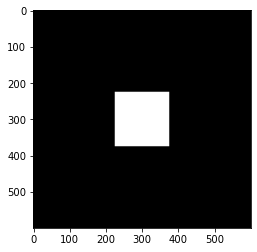

In [3]:
# A. Crie e visualize uma imagem simples – quadrado branco sobre fundo preto
# imagem 512x512 com fundo preto e quadrado branco 150x150 no centro
img_white_square = np.zeros((600, 600, 3), dtype=np.uint8)
img_white_square[225:375, 225:375] = (255, 255, 255)
# mostrar imagem
plt.imshow(img_white_square)
plt.show()

Imagens não centralizadas


<Figure size 432x288 with 0 Axes>

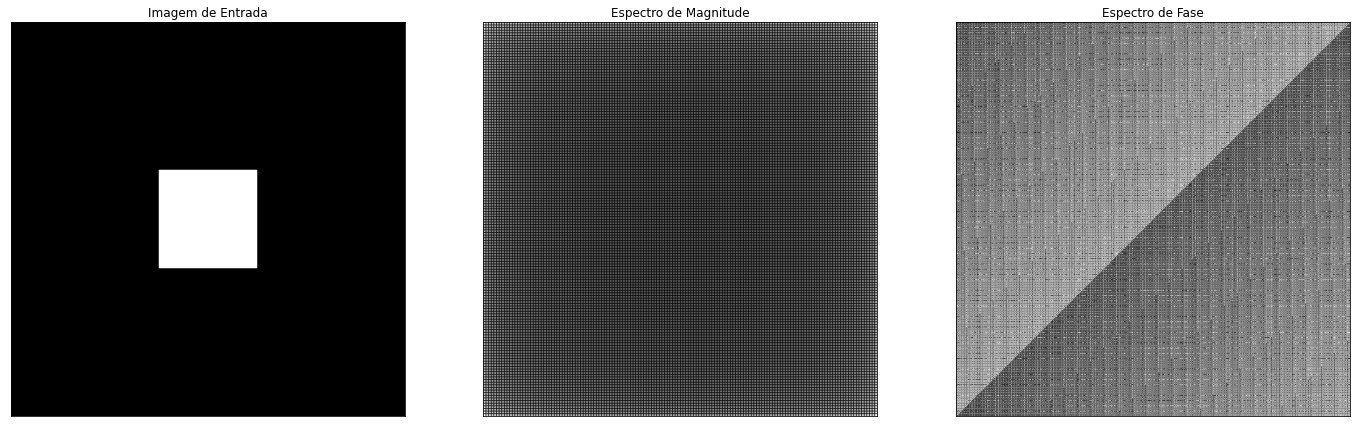

Imagens centralizadas


<Figure size 432x288 with 0 Axes>

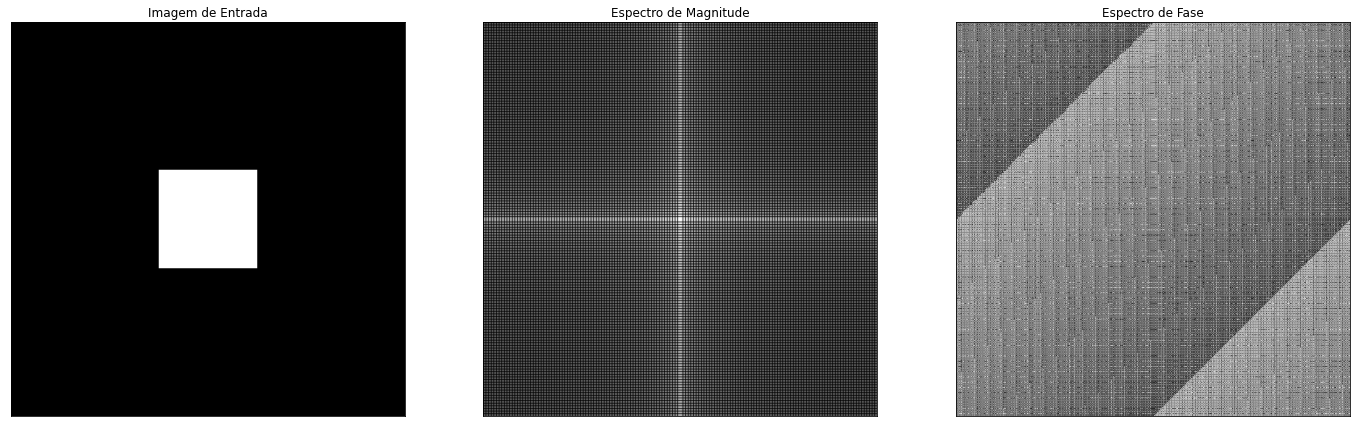

In [4]:
# B. Calcule e visualize seu espectro de Fourier (amplitudes)
# C. Calcule e visualize seu espectro de Fourier (fases)
# D. Calcule e visualize seu espectro de Fourier centralizado (amplitudes e fases)
def apply_fourier_transform(img):
    # Converte a imagem para escala de cinza
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Calcula a DFT da imagem em escala de cinza
    dft = cv2.dft(np.float32(img_gray), flags=cv2.DFT_COMPLEX_OUTPUT)
    # Calcula o espectro de magnitude da DFT
    magnitude_spectrum_dft = 20*np.log(cv2.magnitude(dft[:, :, 0], dft[:, :, 1])+1)
    phase_spectrum_dft = np.angle(dft[:, :, 0] + 1j * dft[:, :, 1])
    # phase_spectrum_dft = np.angle(dft)
    magnitude_spectrum_dft = cv2.normalize(magnitude_spectrum_dft, None, 0, 255, cv2.NORM_MINMAX)
    
    # Cria uma figura para exibir a imagem original, o espectro de magnitude e o espectro de fase não centralizados
    plt.subplots_adjust(wspace=0.2, hspace=0.01)
    plt.figure(figsize=(24, 12))
    
    # Subplot 1: Imagem original em escala de cinza
    plt1 = plt.subplot(1,3,1)
    plt1.set_title('Imagem de Entrada')
    plt1.set_xticks([]), plt1.set_yticks([])
    plt1.imshow(img_gray, cmap='gray')
    
    # Subplot 2: Espectro de Magnitude da DFT
    plt2 = plt.subplot(1,3,2)
    plt2.set_title('Espectro de Magnitude')
    plt2.set_xticks([]), plt2.set_yticks([])
    plt2.imshow(magnitude_spectrum_dft, cmap='gray')
    
    # Subplot 3: Espectro de Fase da DFT
    plt3 = plt.subplot(1,3,3)
    plt3.set_title('Espectro de Fase')
    plt3.set_xticks([]), plt3.set_yticks([])
    plt3.imshow(phase_spectrum_dft, cmap='gray')
    
    print('Imagens não centralizadas')
    
    plt.show()
    
    # Move a origem da DFT para o centro
    dft_shift = np.fft.fftshift(dft)

    # Calcula o espectro de magnitude da DFT Centralizada
    # dft_shift[:, :, 0] = parte real
    dft_real = dft_shift[:, :, 0]
    # dft_shift[:, :, 1] = parte imaginária
    dft_imag = dft_shift[:, :, 1]
    # cv2.magnitude() = sqrt(Re(DFT(img))**2 + Im(DFT(img))**2)
    magnitude_spectrum = 20*np.log(cv2.magnitude(dft_real, dft_imag)+1)
    
    # Calcula o espectro de fase da DFT
    phase_spectrum = np.angle(dft_real + 1j * dft_imag)
    #phase_spectrum = np.angle(dft_shift)
    
    # Normaliza o espectro de magnitude para melhor visualização
    magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX)
    
    # Cria uma figura para exibir a imagem original, o espectro de magnitude e o espectro de fase
    plt.subplots_adjust(wspace=0.2, hspace=0.01) 
    plt.figure(figsize=(24, 12))
    
    # Subplot 1: Imagem original em escala de cinza
    plt1 = plt.subplot(1,3,1)
    plt1.set_title('Imagem de Entrada')
    plt1.set_xticks([]), plt1.set_yticks([])
    plt1.imshow(img_gray, cmap='gray')
    
    # Subplot 2: Espectro de Magnitude da DFT
    plt2 = plt.subplot(1,3,2)
    plt2.set_title('Espectro de Magnitude')
    plt2.set_xticks([]), plt2.set_yticks([])
    plt2.imshow(magnitude_spectrum, cmap='gray')
    
    # Subplot 3: Espectro de Fase da DFT
    plt3 = plt.subplot(1,3,3)
    plt3.set_title('Espectro de Fase')
    plt3.set_xticks([]), plt3.set_yticks([])
    plt3.imshow(phase_spectrum, cmap='gray')
    
    print('Imagens centralizadas')
    
    plt.show()
    
    return magnitude_spectrum, phase_spectrum, dft_shift

magnitude_spectrum, phase_spectrum, dft_shift = apply_fourier_transform(img_white_square)


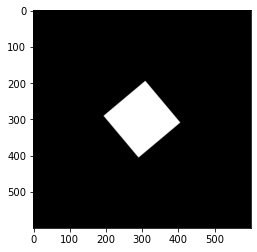

Imagens não centralizadas


<Figure size 432x288 with 0 Axes>

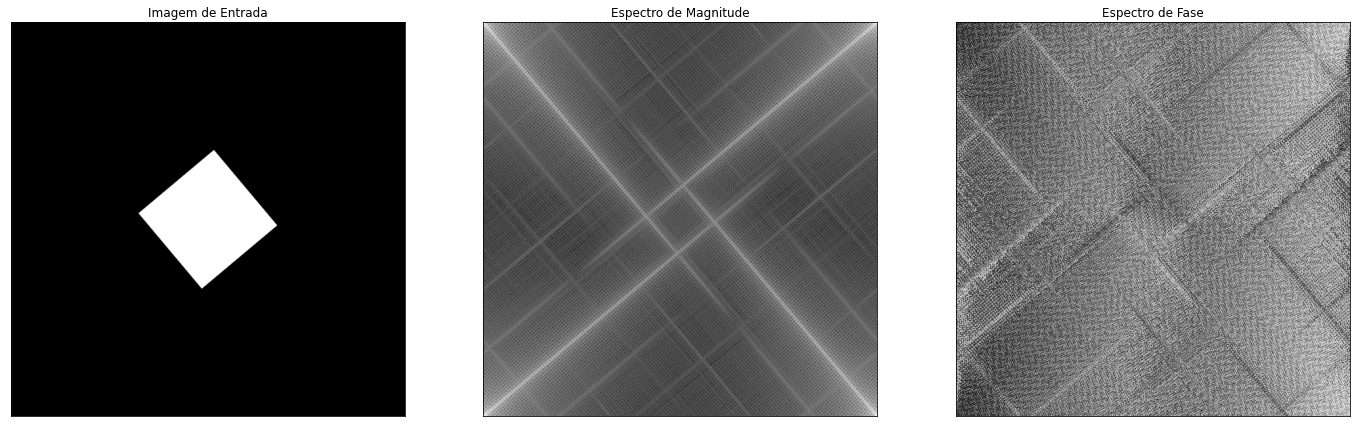

Imagens centralizadas


<Figure size 432x288 with 0 Axes>

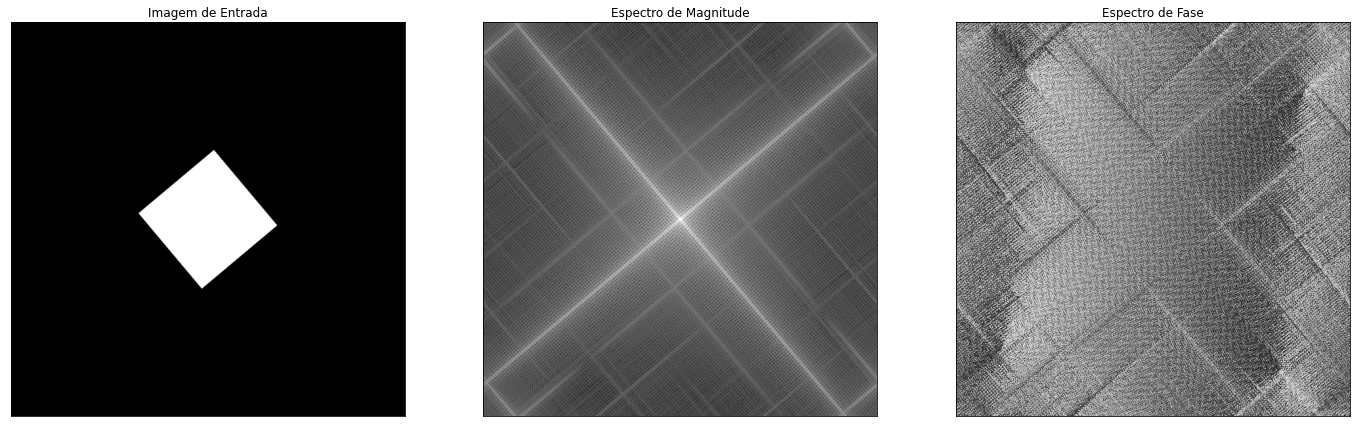

In [5]:
# E. Aplique uma rotação de 40º no quadrado e repita os passos b-d
# Rotaciona o quadrado na imagem 40 graus
rows, cols = img_white_square.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),40,1)
img_white_square_rotated = cv2.warpAffine(img_white_square,M,(cols,rows))

# Mostra a imagem rotacionada
plt.imshow(img_white_square_rotated)
plt.show()

magnitude_spectrum, phase_spectrum, dft_shift = apply_fourier_transform(img_white_square_rotated)

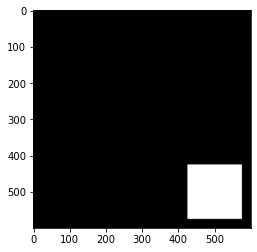

Imagens não centralizadas


<Figure size 432x288 with 0 Axes>

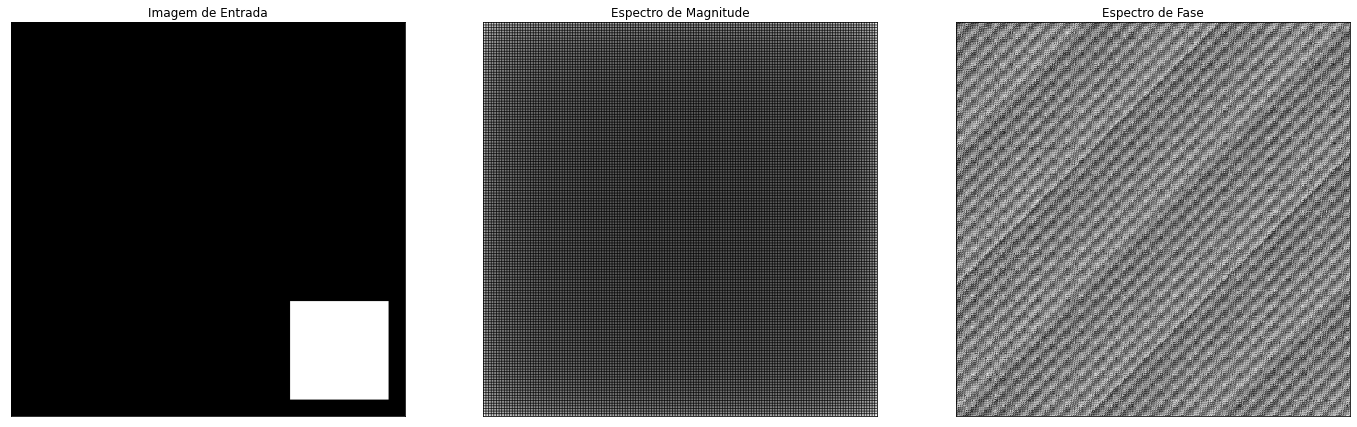

Imagens centralizadas


<Figure size 432x288 with 0 Axes>

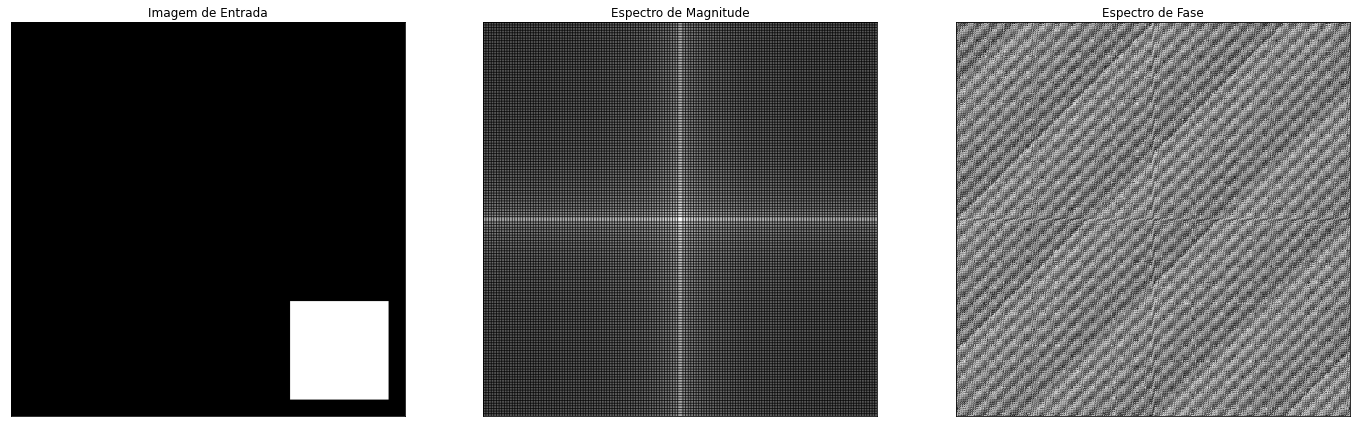

In [6]:
# F. Aplique uma translação nos eixos x e y no quadrado e repita os passos b-d
# Translada o quadrado na imagem 200 pixels para a direita e 200 pixels para baixo
M = np.float32([[1,0,200],[0,1,200]])
img_white_square_translated = cv2.warpAffine(img_white_square,M,(cols,rows))

# Mostra a imagem transladada
plt.imshow(img_white_square_translated)
plt.show()

magnitude_spectrum, phase_spectrum, dft_shift = apply_fourier_transform(img_white_square_translated)

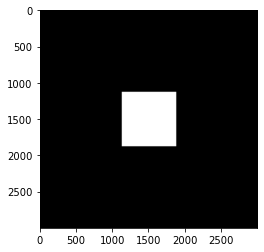

Imagens não centralizadas


<Figure size 432x288 with 0 Axes>

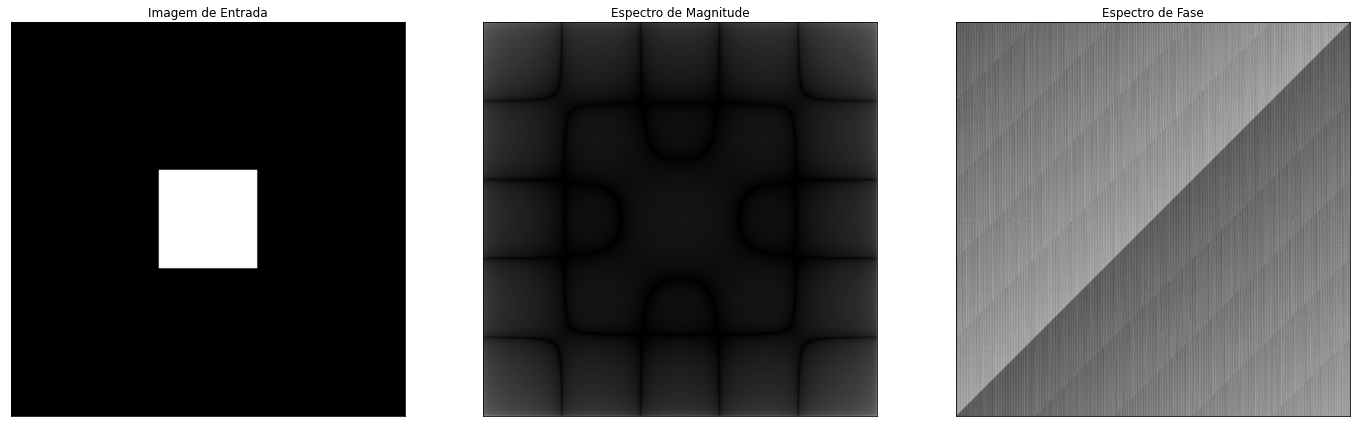

Imagens centralizadas


<Figure size 432x288 with 0 Axes>

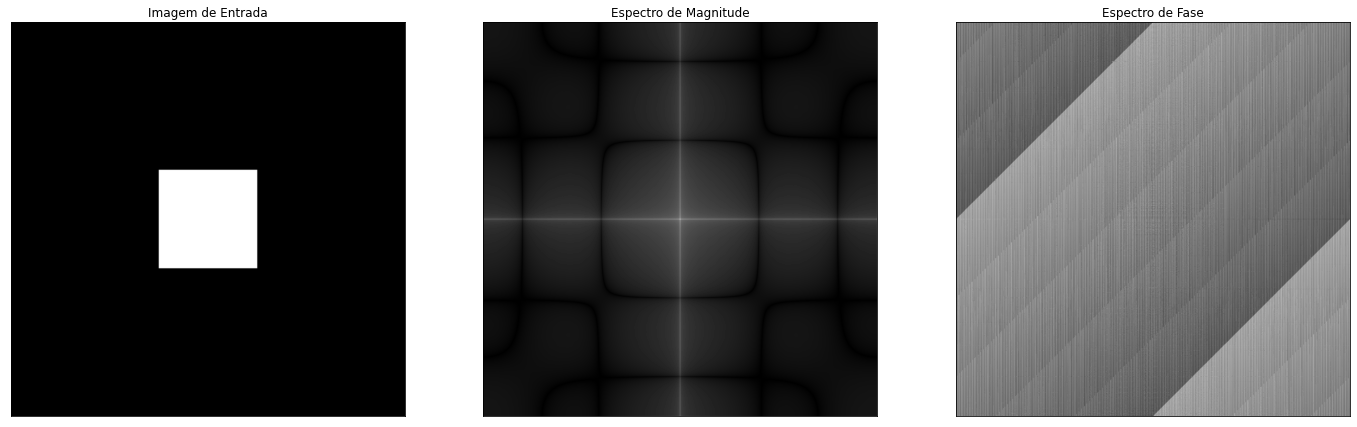

In [11]:
# g) Aplique um zoom na imagem e repita os passos b-d
# Zoom de 5x
img_white_square_zoomed = cv2.resize(img_white_square, (0,0), fx=5, fy=5)

# Mostra a imagem com zoom
plt.imshow(img_white_square_zoomed)
plt.show()

magnitude_spectrum, phase_spectrum, dft_shift = apply_fourier_transform(img_white_square_zoomed)

1. **Rotação**:
   - **Espectro de Amplitude**: A rotação de uma imagem afeta seu espectro de amplitude de Fourier. Os componentes de frequência da imagem são alterados devido à rotação, o que leva a uma redistribuição das amplitudes nos espectros de Fourier. Os detalhes da rotação, como o ângulo de rotação, determinarão como as amplitudes são redistribuídas.
   - **Espectro de Fase**: A rotação também afeta a fase do espectro de Fourier. A fase determina a posição e a orientação das características na imagem. Portanto, a rotação alterará a fase dos componentes de frequência, afetando a orientação das características no espectro de fase.

2. **Translação**:
   - **Espectro de Amplitude**: A translação da imagem não afeta a distribuição das amplitudes no espectro de amplitude, mas pode causar um deslocamento nas frequências em termos de suas coordenadas espaciais.
   - **Espectro de Fase**: A translação na imagem afetará a fase do espectro de Fourier, causando um deslocamento na posição das características no espectro de fase. A magnitude das fases não é afetada pela translação.

3. **Zoom**:
   - **Espectro de Amplitude**: O zoom em uma imagem aumentará ou diminuirá o tamanho das características na imagem. Isso será refletido no espectro de amplitude, onde as frequências também serão ampliadas ou reduzidas, afetando as amplitudes.
   - **Espectro de Fase**: O zoom alterará a escala espacial das características na imagem. Isso também afetará o espectro de fase, causando uma alteração na posição e no tamanho das características no espectro de fase.

Em resumo, a transformada de Fourier é sensível a mudanças na geometria e escala da imagem. Rotações, translações e zooms afetarão os espectros de Fourier de diferentes maneiras, resultando em redistribuição de amplitudes, deslocamento de frequências e alteração na escala das características. Essas mudanças nos espectros de Fourier podem ser úteis em várias aplicações, como reconhecimento de padrões, processamento de imagem e visão computacional, onde a análise das características de frequência é essencial para entender as transformações na imagem.
